### Рубежный контроль №1
### Вариант 14
### Тислюк Дмитрий ИУ5-22М

#### Задача 14

Для набора данных проведите нормализацию для одного (произвольного) числового признака с использованием функции "квадратный корень".

#### Задача 34

Для набора данных проведите процедуру отбора признаков (feature selection). Используйте метод вложений (embedded method). Используйте подход на основе линейной или логистической регрессии (в зависимости от того, на решение какой задачи ориентирован выбранный Вами набор данных - задачи регрессии или задачи классификации).

#### Дополнительные требовния

Для студентов групп ИУ5-22М, ИУ5И-22М - для произвольной колонки данных построить гистограмму.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
import sklearn

In [128]:
data = pd.read_excel('CARSEX.xlsx')
data.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36.945,33.337,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23.820,21.761,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26.990,24.647,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33.195,30.299,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43.755,39.014,3.5,6,225,18,24,3880,115,197


In [129]:
data_features = list(zip(
# признаки
[i for i in data.columns],
zip(
    # типы колонок
    [str(i) for i in data.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Make', ('object', 0)),
 ('Model', ('object', 0)),
 ('Type', ('object', 0)),
 ('Origin', ('object', 0)),
 ('DriveTrain', ('object', 0)),
 ('MSRP', ('float64', 0)),
 ('Invoice', ('float64', 0)),
 ('EngineSize', ('float64', 0)),
 ('Cylinders', ('int64', 0)),
 ('Horsepower', ('int64', 0)),
 ('MPG_City', ('int64', 0)),
 ('MPG_Highway', ('int64', 0)),
 ('Weight', ('int64', 0)),
 ('Wheelbase', ('int64', 0)),
 ('Length', ('int64', 0))]

In [130]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

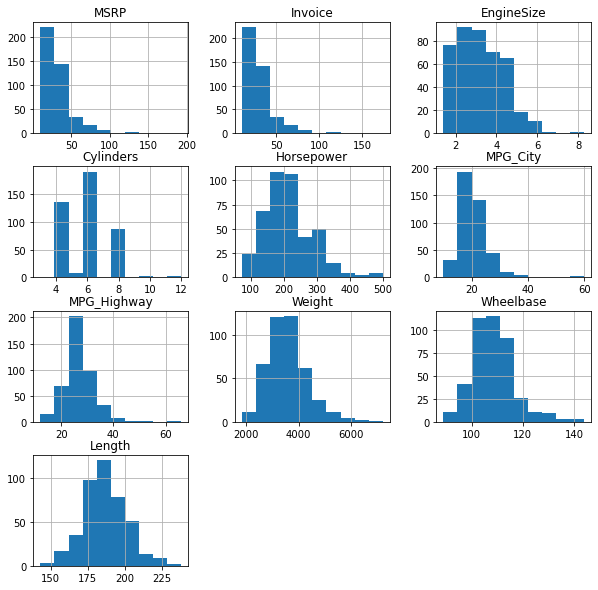

In [131]:
data.hist(figsize=(10,10));

#### Нормализация числового признака Horsepower

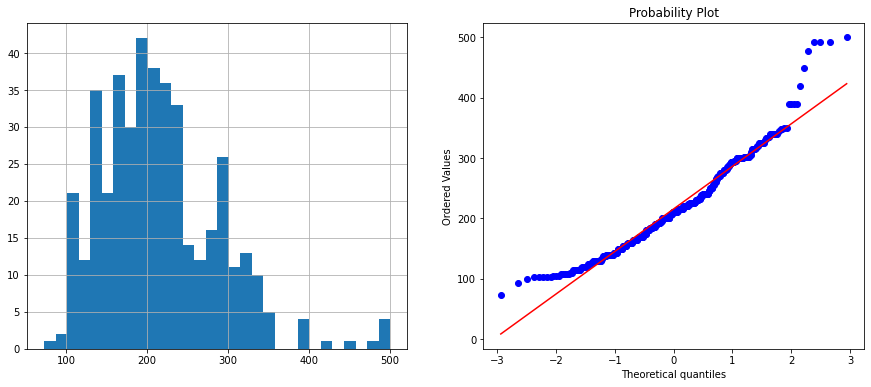

In [132]:
diagnostic_plots(data, 'Horsepower')

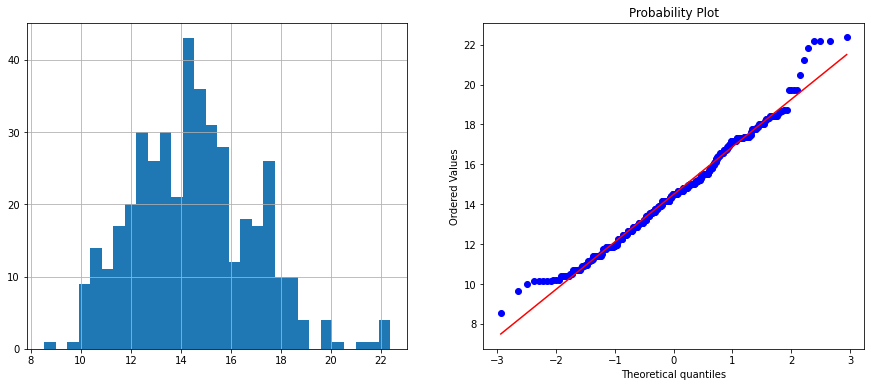

In [133]:
data['Horsepower_sqrt'] = data['Horsepower']**(1/2) 
diagnostic_plots(data, 'Horsepower_sqrt')

#### Отбор признаков (feature selection) через метод вложений (embedded method), используя подход на основе линейной регрессии

In [134]:
X = data.drop(columns = ['Make','Model','Type','Origin','DriveTrain', 'Horsepower_sqrt', 'Invoice', 'MSRP'])
y = data['MSRP']

In [135]:
feature_names = [i for i in X.columns]
feature_names

['EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [136]:
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X, y)
# Коэффициенты регрессии
list(zip(feature_names, e_ls1.coef_))

[('EngineSize', -0.0),
 ('Cylinders', 0.0),
 ('Horsepower', 0.24415225302933974),
 ('MPG_City', 0.0),
 ('MPG_Highway', 0.5363301683331865),
 ('Weight', 0.005249089816929752),
 ('Wheelbase', -0.5988269486900966),
 ('Length', -0.012828573484294595)]

#### Гистограмма

<function matplotlib.pyplot.show(close=None, block=None)>

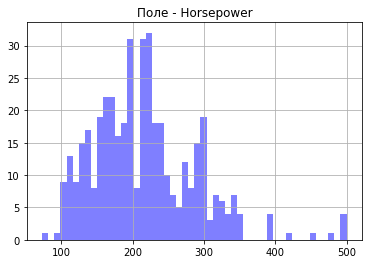

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.title.set_text('Поле - ' + str('Horsepower'))
data['Horsepower'].hist(bins=50, ax=ax, color='blue', alpha=0.5)
plt.show